# Interaction with gym

## Outlook



In this notebook, we explain the central interaction loop in reinforcement learning (RL) when using gym environments


## Install Dependencies and Stable Baselines 3 Using Pip

The list of full dependencies can be found in the [README](https://github.com/DLR-RM/stable-baselines3).

In [ ]:
! pip install stable-baselines3

## The core interaction loop

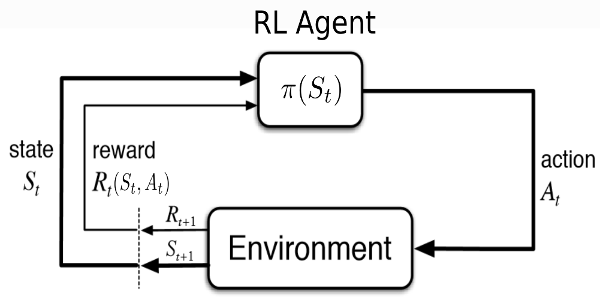

The figure above is the standard figure to present the interaction between an agent and its environment in RL. We first explain how to get an environment and an agent.

### Gym environments

In most RL libraries, the environment is represented as an object which follows the [gym interface](https://stable-baselines3.readthedocs.io/en/master/guide/custom_env.html). This interface is quite simple to use.
It provides to this user mainly three methods:
- `reset()` called at the beginning of an episode, it returns an observation
- `step(action)` called to perform an action in the environment, it returns the next observation, the immediate reward, whether the episode is over and a place holder for any additional information that one may need
- (Optional) `render(method='human')` provding a visualization of the agent in action. Note that graphical interfaces do not work inside google colab (the code is run from an external machine), so we cannot use it directly here (we have to rely on `method='rbg_array'` to retrieve an image of the scene...

Under the hood, it also contains two useful properties:
- `observation_space` which is one of the gym spaces (`Discrete`, `Box`, ...) and describes the type and shape of the observation
- `action_space` which is also a gym space object that describes the action space, i.e. the type or list of actions that can be taken

The best way to learn about gym spaces is to look at the [source code](https://github.com/openai/gym/tree/master/gym/spaces), but you need to know at least the main ones:
- `gym.spaces.Box`: A (possibly unbounded) box in $R^n$. Specifically, a Box represents the Cartesian product of n closed intervals. Each interval has the form of one of [a, b], (-oo, b], [a, oo), or (-oo, oo). Example: A 1D-Vector or an image observation can be described with the Box space.

- `gym.spaces.Discrete`: A discrete space in $\{ 0, 1, \dots, n-1 \}$
  Example: if you have two actions ("left" and "right") you can represent your action space using `Discrete(2)`, the first action will be 0 and the second 1.

In [ ]:
# Example for using image as input:
import gym
import numpy as np
observation_space = gym.spaces.Box(low=0, high=255, shape=(1, 1), dtype=np.uint8)

You can find a list of available environments [here](https://gym.openai.com/envs/#classic_control).

It is also recommended to check the [source code](https://github.com/openai/gym) to learn more about the observation and action space of each environment, as gym does not have a proper documentation.
Not all algorithms can work with all action spaces, you can find more on this in the [recap table](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html)

Let us import gym (and numpy)


In [ ]:
import gym
import numpy as np

## Create the Gym env and instantiate the agent

For this example, we will use CartPole environment, a classic control problem.

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole environment: [https://www.gymlibrary.ml/environments/classic_control/cart_pole/](https://www.gymlibrary.ml/environments/classic_control/cart_pole/)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)





### Stable Baselines 3 agents

After seeing environments, let us now look at agents.

In Stable Baselines 3, the agent consists of an RL algorithm.

The first thing you need to import is the RL agent, check the [documentation](https://github.com/DLR-RM/rl-baselines3-zoo#current-collection-100-trained-agents) to know what you can use on which problem

In [ ]:
from stable_baselines3 import PPO, A2C, SAC, TD3, DQN

The next thing you need to import is the policy class that will be used to create the networks (for the policy/value functions).
This step is optional as you can directly use strings in the constructor:

```PPO("MlpPolicy", env)``` instead of ```PPO(MlpPolicy, env)```

Note that some algorithms like `SAC` have their own `MlpPolicy`, that's why using string for the policy is the recommended option.

In [ ]:
from stable_baselines3.ppo.policies import MlpPolicy

We chose the MlpPolicy because the observation of the CartPole task is a feature vector, not images.

The type of action to use (discrete/continuous) will be automatically deduced from the environment action space


### The core interaction loop

Now we have the elements to build the core interaction loop between the agent and the environment. This loop will be at the heart of the RL process.

See the comments to better understand what is expected as input/output.

In [ ]:
from stable_baselines3.common.base_class import BaseAlgorithm

def evaluate_agent(
    agent: BaseAlgorithm,
    env: gym.Env,
    deterministic: bool = False,
) -> float:
    """
    Evaluate an RL agent for 1 episode.

    :param model: the RL Agent
    :param env: the gym Environment
    :param deterministic: Whether to use deterministic or stochastic actions
    :return: Mean reward for the episode.
    """


    # Retrieve first observation
    obs = env.reset()
    total_reward = 0
    done = False
    # Your code here


    while not done:
      # The agent predicts the action to take given the observation
      action, _ = agent.predict_action(obs)

      # Check that predict is properly used: we use discrete actions,
      # therefore `action` should be an int here
      assert env.action_space.contains(action)

      print(action)

      # The environment performs a step and produces the next state, the reward
      # and whether the episode is over. The info return is a placeholder for
      # any supplementary information that one may need.

      # Your code here

      next_obs, reward, done, info = env.step(action)
      total_reward = total_reward + reward

      print(f"obs_shape={obs.shape}, reward={reward}, done? {done}")

      # The total reward over the episode is the sum of rewards at each step
      # no discount here, discount is used in the reinforcement learning process

      # Your code here

    return total_reward





And let us test the loop with an agent and an environment without event training the agent (we don't care about this aspect here).

In [ ]:
# Create the gym Env
env = gym.make("CartPole-v1")

print(env.observation_space)
print(env.action_space)

# Create the RL agent
agent = PPO("MlpPolicy", env)

# Call the interaction loop
reward = evaluate_agent(agent, env)

# Print the final reward
print(reward)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Discrete(2)
13.0


### About PPO


Here we are using the [Proximal Policy Optimization](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html) algorithm, which is an Actor-Critic method: it uses a value function to improve the policy gradient descent (by reducing the variance).

It combines ideas from [A2C](https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html) (having multiple workers and using an entropy bonus for exploration) and [TRPO](https://stable-baselines.readthedocs.io/en/master/modules/trpo.html) (it uses a trust region to improve stability and avoid catastrophic drops in performance).

PPO is an on-policy algorithm, which means that the trajectories used to update the networks must be collected using the latest policy.
It is usually less sample efficient than off-policy alorithms like [DQN](https://stable-baselines.readthedocs.io/en/master/modules/dqn.html), [SAC](https://stable-baselines3.readthedocs.io/en/master/modules/sac.html) or [TD3](https://stable-baselines3.readthedocs.io/en/master/modules/td3.html), but is much faster regarding wall-clock time.

## Custom environment

Below you can find an example of a custom environment:


[Documentation on custom env](https://stable-baselines3.readthedocs.io/en/master/guide/custom_env.html)

In [ ]:

from typing import Any, Callable, Dict, List, NamedTuple, Tuple, Union

import gym
import numpy as np

from stable_baselines3.common.env_checker import check_env

GymObs = Union[Tuple, Dict, np.ndarray, int]

class CustomEnv(gym.Env):
  """
  Minimal custom environment to demonstrate the Gym interface.
  """
  def __init__(self):
    super(CustomEnv, self).__init__()
    self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(14,))
    self.action_space = gym.spaces.Box(low=-1, high=1, shape=(6,))

  def reset(self) -> GymObs:
    """
    Called at the beginning of an episode.
    :return: the first observation of the episode
    """
    return self.observation_space.sample()

  def step(self, action: Union[int, np.ndarray]) -> Tuple[GymObs, float, bool, Dict]:
    """
    Step into the environment.
    :return: A tuple containing the new observation, the reward signal,
      whether the episode is over and additional informations.
    """
    obs = self.observation_space.sample()
    reward = 1.0
    done = False
    infos = {}
    return obs, reward, done, infos

env = CustomEnv()
# Check your custom environment
# this will print warnings and throw errors if needed
check_env(env)

# Additional algorithms: the contrib repo

https://github.com/Stable-Baselines-Team/stable-baselines3-contrib

In [ ]:
from sb3_contrib import QRDQN, TQC

# Prepare video recording

Set up fake display; otherwise rendering will fail

In [ ]:
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

We will record a video using the [VecVideoRecorder](https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecvideorecorder) wrapper, you can learn more about those wrappers in the SB3 Documentation.

In [ ]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

### Visualize trained agent

In [ ]:
record_video('CartPole-v1', model, video_length=500, prefix='ppo-cartpole')

show_videos('videos', prefix='ppo')

## Exercise (5 minutes): Save, Load The Model and check that the loading was correct

Save the model and then load it.

Don't forget to check that loading went well: the model must predict the same actions given the same  observations.

In [ ]:

# Sample observations using the environment observation space

# Predict actions on those observations using trained model


# Save the model


# Delete the model (to demonstrate loading)
del model

!ls *.zip

# Load the model


# Predict actions on the observations with the loaded model


# Check that the predictions are the same
assert np.allclose(action_before_saving, action_after_loading), "Somethng went wrong in the loading"

## Bonus: Train a RL Model in One Line

The policy class to use will be inferred and the environment will be automatically created. This works because both are [registered](https://stable-baselines3.readthedocs.io/en/master/guide/quickstart.html).



In [ ]:
model = PPO('MlpPolicy', "CartPole-v1", verbose=1).learn(1000)